In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers, models

#Loading the data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Teeth DataSet.zip to Teeth DataSet.zip


In [3]:
#unziping the file

import zipfile
import os

zip_file_path = '/content/Teeth DataSet.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [7]:
train_dir = '/content/dataset/Teeth DataSet/Teeth_Dataset/Training'
test_dir = '/content/dataset/Teeth DataSet/Teeth_Dataset/Testing'
validation_dir = '/content/dataset/Teeth DataSet/Teeth_Dataset/Validation'

###visualizing the data befor data augmentation

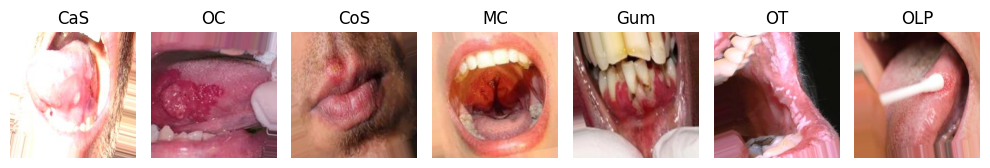

In [8]:
import os
import random
import matplotlib.pyplot as plt
import cv2

data_dir = "/content/dataset/Teeth DataSet/Teeth_Dataset/Training"
classes = os.listdir(data_dir)

#Set up a figure for plotting
fig = plt.figure(figsize=(10, 7))

#Loop through each class
for i, class_name in enumerate(classes, start=1):
    class_dir = os.path.join(data_dir, class_name)
    # List all images in the class directory
    images = os.listdir(class_dir)

    # Pick a random image from the class
    random_image = random.choice(images)
    image_path = os.path.join(class_dir, random_image)

    # Load and plot the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert colors from BGR to RGB

    # Add subplot for the current class
    ax = fig.add_subplot(1, len(classes), i)
    ax.set_title(class_name)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

###Data generator with augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Creating a data generator for validation and test (no augmentation, just rescaling)
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
#loading the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

#loading the validation data
validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

#loading the test data
test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


###visualizing the data after data augmentation

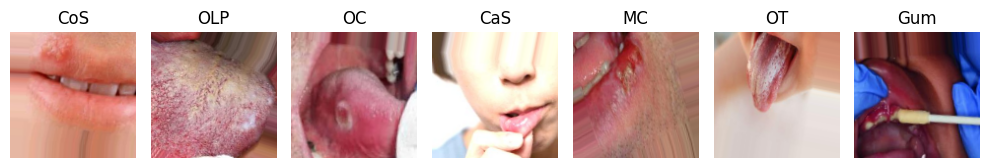

In [13]:
# Get class indices
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

# Create a dictionary to store one image per class
class_images = {}

# Loop until we have one image per class
for _ in range(100):  # Arbitrary large number to ensure all classes are covered
    img_batch, label_batch = next(train_generator)  # Get a batch of augmented images and labels
    for img, label in zip(img_batch, label_batch):
        class_index = np.argmax(label)
        class_name = classes[class_index]
        if class_name not in class_images:
            # Convert the image from [0, 1] to [0, 255] and ensure it's uint8
            img_uint8 = (img * 255).astype(np.uint8)
            class_images[class_name] = img_uint8
        if len(class_images) == len(classes):  # Stop if we have one image per class
            break
    if len(class_images) == len(classes):
        break

# Set up a figure for plotting
fig = plt.figure(figsize=(10, 7))

# Plot one random image from each class
for i, (class_name, img) in enumerate(class_images.items(), start=1):
    ax = fig.add_subplot(1, len(classes), i)
    ax.set_title(class_name)
    ax.imshow(img)  # Now the image is in uint8 format
    ax.axis('off')

plt.tight_layout()
plt.show()


#Training the model

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [ ]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 144ms/step - accuracy: 0.3053 - loss: 1.7454 - val_accuracy: 0.3191 - val_loss: 1.7328
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 143ms/step - accuracy: 0.3022 - loss: 1.7573 - val_accuracy: 0.3230 - val_loss: 1.6900
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.3186 - loss: 1.7067 - val_accuracy: 0.3191 - val_loss: 1.6830
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - accuracy: 0.3105 - loss: 1.7311 - val_accuracy: 0.3551 - val_loss: 1.6485
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 144ms/step - accuracy: 0.3050 - loss: 1.7424 - val_accuracy: 0.3804 - val_loss: 1.6140
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - accuracy: 0.3024 - loss: 1.7285 - val_accuracy: 0.3794 - val_loss: 1.6125
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - accuracy: 0.3131 - loss: 1.7179 - val_accuracy: 0.3716 - val_loss: 1.6145
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 142ms/step - accuracy: 0.3132 - loss: 1.7308 - val_accu

In [ ]:
eval = model.evaluate(test_generator)
print("Test Loss:", eval[0])
print("Test Accuracy:", eval[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4600 - loss: 1.4059
Test Loss: 1.3988220691680908
Test Accuracy: 0.45719844102859497


#Another approach

In [ ]:
#Creating CNN model

IMG_SIZE = 128
model2 = tf.keras.models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Conv2D(256, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(7, activation='softmax')
])
model2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,769,287 (18.19 MB)

 Trainable params: 4,769,287 (18.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = model2.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)


Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.1501 - loss: 1.9410 - val_accuracy: 0.1751 - val_loss: 1.9287
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 151ms/step - accuracy: 0.1857 - loss: 1.9175 - val_accuracy: 0.1751 - val_loss: 1.9475
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.2087 - loss: 1.9242 - val_accuracy: 0.2422 - val_loss: 1.8588
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.2330 - loss: 1.8610 - val_accuracy: 0.2101 - val_loss: 1.8681
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.2565 - loss: 1.8218 - val_accuracy: 0.2665 - val_loss: 1.7953
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 151ms/step - accuracy: 0.3154 - loss: 1.7413 - val_accuracy: 0.3492 - val_loss: 1.6709
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.3253 - loss: 1.7267 - val_accuracy: 0.3638 - val_loss: 1.6285
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.3527 - loss: 1.6795 - val_accu

In [ ]:
eval = model2.evaluate(test_generator)
print("Test Loss:", eval[0])
print("Test Accuracy:", eval[1])

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9407 - loss: 0.1874
Test Loss: 0.20138520002365112
Test Accuracy: 0.9396887421607971
